In [1]:
%load_ext autoreload
%autoreload 2

In [3]:
import sys
sys.path.append('../python')
from functions import *
from models import *
import tensorflow as tf
from livelossplot import PlotLossesKeras
os.environ["CUDA_VISIBLE_DEVICES"] = "2" # pick a number < 4 on ML4HEP; < 3 on Voltan 
gpu_options = tf.GPUOptions(allow_growth=True, per_process_gpu_memory_fraction=0.5)
sess = tf.Session(config=tf.ConfigProto(gpu_options=gpu_options))
# physical_devices = tf.config.list_physical_devices('GPU') 
# tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [2]:
from keras.layers import Input, Dense, Dropout
from keras.models import Model, Sequential
from sklearn.metrics import roc_curve, auc,roc_auc_score
from sklearn.model_selection import train_test_split
import pandas as pd
from matplotlib import gridspec
from scipy import stats
from sklearn import preprocessing
import os
import keras
os.environ["CUDA_VISIBLE_DEVICES"]="0"
import random
from sklearn.model_selection import KFold

import tensorflow as tf
physical_devices = tf.config.list_physical_devices('GPU') 
tf.config.experimental.set_memory_growth(physical_devices[0], True)
#gpu_options = tf.GPUOptions(allow_growth=True, per_process_gpu_memory_fraction=0.5)
#sess = tf.Session(config=tf.ConfigProto(gpu_options=gpu_options))

2022-02-09 15:27:00.996470: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2022-02-09 15:27:01.558332: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1561] Found device 0 with properties: 
pciBusID: 0000:05:00.0 name: GeForce GTX 1080 Ti computeCapability: 6.1
coreClock: 1.582GHz coreCount: 28 deviceMemorySize: 10.91GiB deviceMemoryBandwidth: 451.17GiB/s
2022-02-09 15:27:01.558614: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
2022-02-09 15:27:01.561153: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcublas.so.10
2022-02-09 15:27:01.563262: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcufft.so.10
2022-02-09 15:27:01.563806: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcurand.so

In [17]:
# with tf.Session() as sess:
#   devices = sess.list_devices()

AttributeError: module 'tensorflow' has no attribute 'Session'

In [8]:
# devices

In [4]:
df, my_file = load_file(stream = "gd1_tail", folder = 
                        "/data0/users/sowmyathanvantri/gaia_data" , 
                        percent_bkg = 25)

Before reduction, stream stars make up 0.088% of the dataset.
After reduction, stream stars make up 1.695% of the dataset.


In [13]:
df

,index,μ_δ,μ_α,δ,α,color,mag,lon,lat,μ_loncoslat,μ_lat,stream,patch_id
0,19356,-12.848708,1.698121,-1.930447,4.007488,1.559694,20.087410,-8.691782,-4.820429,-1.276113,-12.897459,False,6
1,20169,-1.160676,-1.392514,-1.675480,4.748348,1.199144,18.947060,-8.217814,-4.666716,-1.611219,-0.830805,False,6
2,20203,-1.222309,-8.711292,-0.258679,4.471493,2.063076,20.034475,-8.059545,-3.250130,-8.766226,0.730708,False,6
3,20463,-13.103597,-4.145335,-0.951893,2.053341,1.663376,19.468086,-9.538304,-3.601267,-7.364570,-11.603929,False,6
4,20580,-0.115387,2.322608,-0.966717,3.578060,1.403511,18.928816,-8.707512,-3.826190,2.231117,-0.655698,False,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
145204,896272,-14.171809,-14.309252,-8.385239,0.470882,1.790224,19.842806,13.595374,0.191857,-9.941564,-17.514570,False,19
145205,896294,-5.491077,-11.994883,-8.091485,1.369900,0.896637,18.612877,14.087554,0.638905,-9.961689,-8.648346,False,19
145206,896352,-15.531284,-3.372686,-7.809983,1.792766,0.729877,18.670086,14.274953,0.988120,1.227322,-15.845804,False,19
145207,896377,5.994580,5.221207,-8.668507,0.884823,1.673910,19.883654,13.938431,-0.005206,3.366077,7.201772,False,19


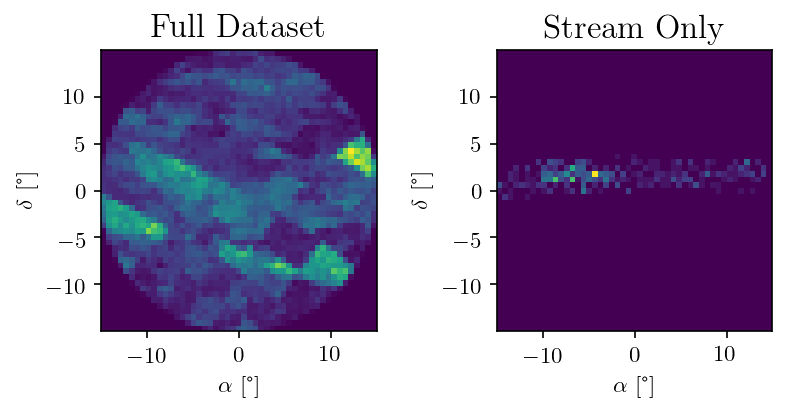

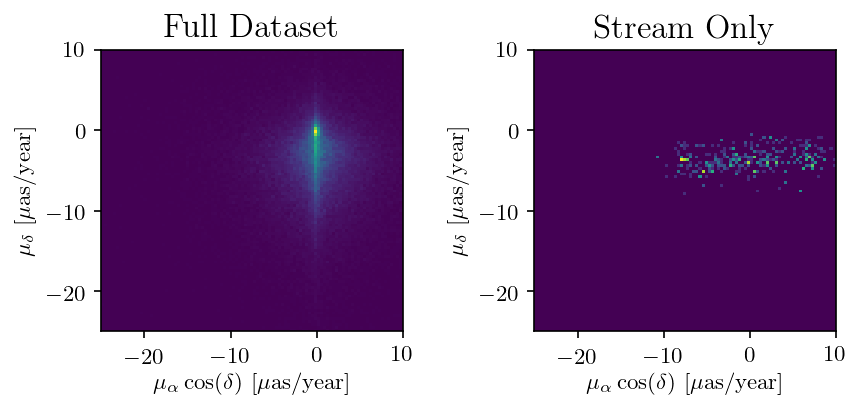

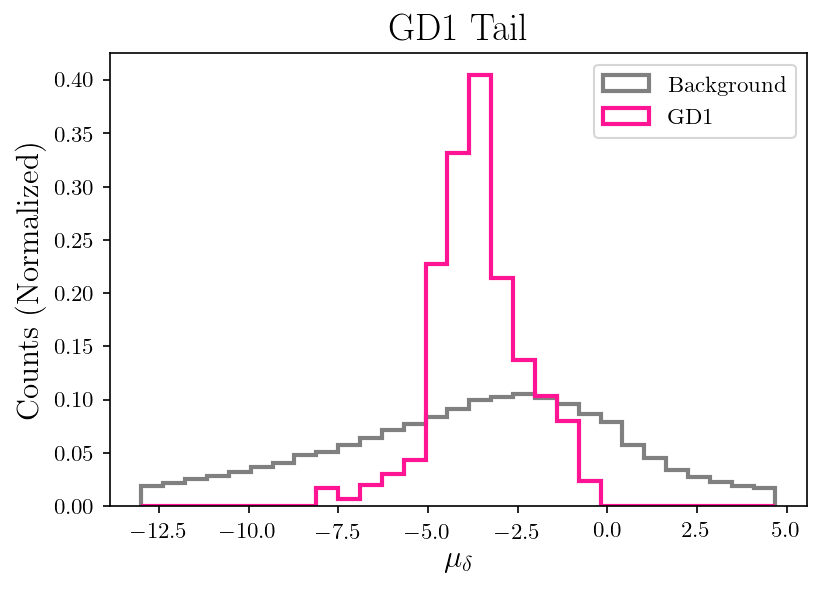

In [14]:
visualize_stream(df)

Sideband region: [-127.5,50.5]
Signal region: [-126.5,49.5]
Total counts: SR = 145,207, SB = 0


/home/sowmyathanvantri/GaiaCWoLa/functions.py:266: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_slice['label'] = np.where(((df_slice.μ_δ > sr_min) & (df_slice.μ_δ < sr_max)), 1, 0)
No handles with labels found to put in legend.


Signal region has 490 stream and 144,717 bkg events (0.34%).


ZeroDivisionError: division by zero

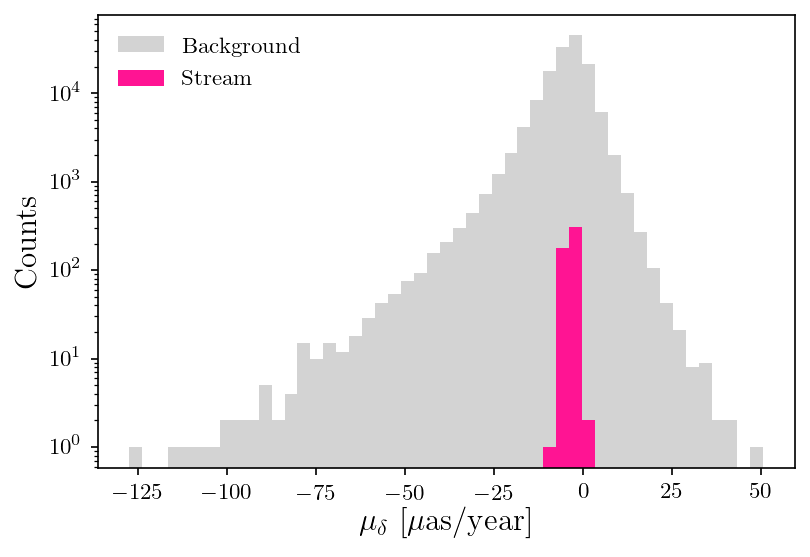

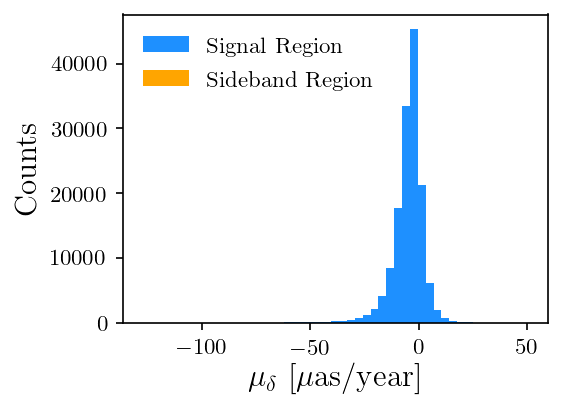

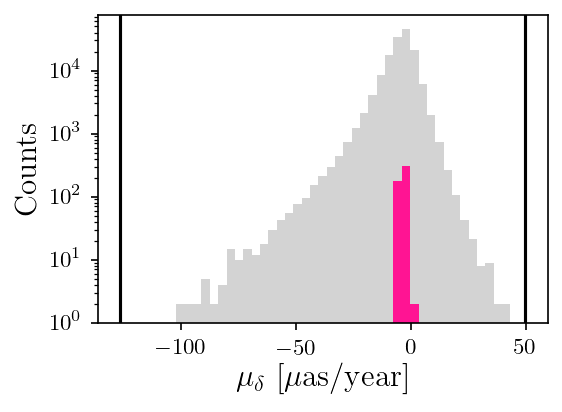

In [15]:
signal_sideband(df)

Sideband region: [-7.0,-3.0]
Signal region: [-6.0,-3.1]
Total counts: SR = 31,921, SB = 9,393


/home/sowmyathanvantri/GaiaCWoLa/functions.py:266: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_slice['label'] = np.where(((df_slice.μ_δ > sr_min) & (df_slice.μ_δ < sr_max)), 1, 0)
No handles with labels found to put in legend.


Signal region has 332 stream and 31,589 bkg events (1.05%).
Sideband region has 22 stream and 9,371 bkg events (0.23%).
f_sig = 4.5X f_sideband.


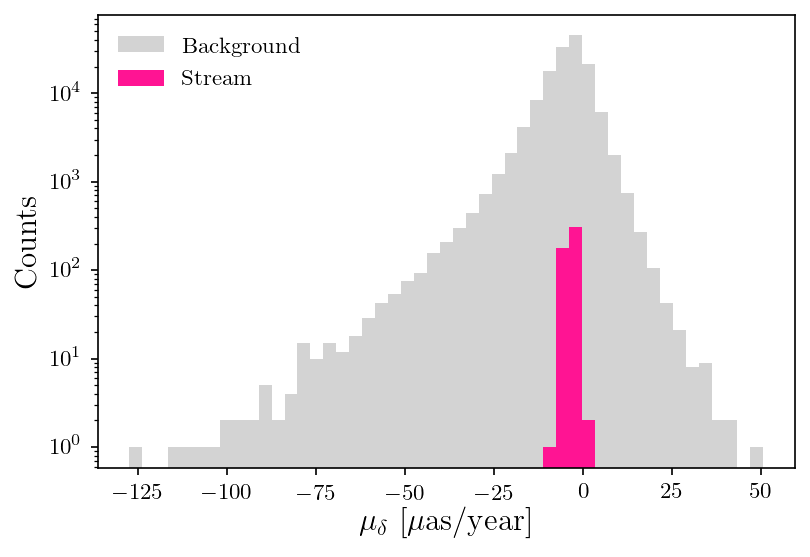

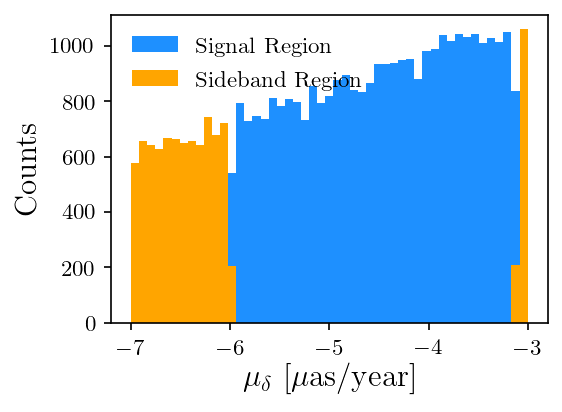

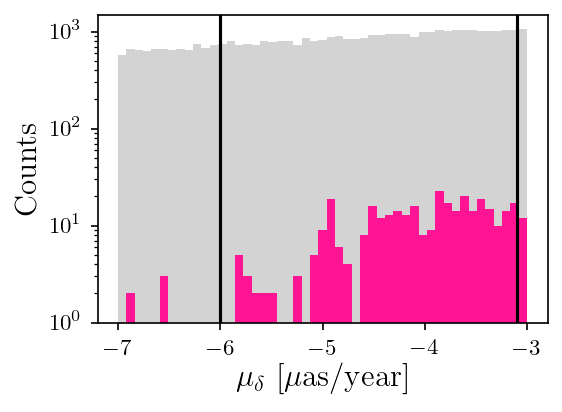

In [16]:
sr_sb = signal_sideband(df, sb_min = -7, sb_max = -3, sr_min = -6, sr_max = -3.1)

In [17]:
sr_sb #label = 1 -> signal region

,index,μ_δ,μ_α,δ,α,color,mag,lon,lat,μ_loncoslat,μ_lat,stream,patch_id,label
5,20582,-6.488259,8.642030,-0.641270,3.255855,1.835875,20.490328,-8.806464,-3.467238,6.843983,-8.363138,False,6,0
8,20767,-4.618866,-6.906972,-1.795899,4.714168,0.818691,14.612309,-8.263300,-4.779992,-7.746421,-3.005520,False,6,1
12,21113,-6.086781,6.568146,-1.541459,3.462551,1.019257,17.123960,-8.906775,-4.369441,4.947168,-7.464246,False,6,0
15,21138,-6.395085,-4.552489,-1.720116,3.917644,0.995412,15.499173,-8.694059,-4.603842,-5.897327,-5.181101,False,6,0
18,21175,-3.256101,-5.974384,-0.822419,3.653988,1.018511,19.756109,-8.632146,-3.695847,-6.568368,-1.775388,False,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145190,895654,-3.879506,-7.221442,-8.602189,0.614269,0.803680,20.594557,13.746269,0.008999,-5.891980,-5.699506,False,19,1
145193,895762,-5.136614,1.751029,-7.646786,2.595730,1.424196,20.255377,14.731757,1.298200,3.197565,-4.384802,False,19,1
145196,895993,-4.058486,-10.602952,-7.427056,1.656948,0.750036,17.371944,14.080001,1.329544,-9.003750,-6.915662,False,19,1
145205,896294,-5.491077,-11.994883,-8.091485,1.369900,0.896637,18.612877,14.087554,0.638905,-9.961689,-8.648346,False,19,1


In [37]:
SR = np.array(sr_sb[sr_sb.label == 1])[:, 1:7]

In [38]:
SR

array([[-4.618866443634033, -6.9069719314575195, -1.7958989389999473,
        4.714168446710204, 0.8186912536621094, 14.612308502197266],
       [-3.256100654602051, -5.974384307861328, -0.8224187143905723,
        3.653987782647704, 1.0185108184814453, 19.7561092376709],
       [-3.14245867729187, 2.898148536682129, -0.8954777964218223,
        2.7389029437805164, 1.5817832946777344, 20.358243942260742],
       ...,
       [-5.136613845825195, 1.7510294914245605, -7.646786237583932,
        2.595729726007079, 1.4241962432861328, 20.2553768157959],
       [-4.058485507965088, -10.602952003479004, -7.427055860386666,
        1.6569479877258289, 0.7500362396240234, 17.371944427490234],
       [-5.491077423095703, -11.994882583618164, -8.091484571324166,
        1.3698996478820789, 0.896636962890625, 18.612876892089844]],
      dtype=object)

In [39]:
SB = np.array(sr_sb[sr_sb.label == 0])[:, 1:7]

In [41]:
X = np.concatenate([SR, SB])

In [42]:
X

array([[-4.618866443634033, -6.9069719314575195, -1.7958989389999473,
        4.714168446710204, 0.8186912536621094, 14.612308502197266],
       [-3.256100654602051, -5.974384307861328, -0.8224187143905723,
        3.653987782647704, 1.0185108184814453, 19.7561092376709],
       [-3.14245867729187, 2.898148536682129, -0.8954777964218223,
        2.7389029437805164, 1.5817832946777344, 20.358243942260742],
       ...,
       [-6.71001672744751, 2.697819471359253, -8.755093122349557,
        0.7818411762023914, 0.7177925109863281, 16.672103881835938],
       [-3.069000482559204, -0.9472002983093262, -7.91346790872651,
        0.8648642474914539, 0.6452770233154297, 20.555742263793945],
       [-6.748867988586426, 1.8106379508972168, -8.875008130894479,
        0.6402243549133289, 0.8840923309326172, 18.174076080322266]],
      dtype=object)

In [43]:
Y = np.concatenate([np.ones(len(SR)),np.zeros(len(SB))])

In [44]:
Y

array([1., 1., 1., ..., 0., 0., 0.])

In [45]:
myscalar = preprocessing.StandardScaler()
myscalar.fit(X)
X_scaled = myscalar.transform(X)

X_scaled = X_scaled[Y<2]
Y = Y[Y<2]





In [74]:
def model(X_scaled, Y, myscalar, background, epochs, dropout, learning_rate, num_loops, num_splits):
    
    np.random.seed(27)
    np.random.shuffle(X_scaled)
    np.random.seed(27)
    np.random.shuffle(Y)

    split_X = split(X_scaled, num_splits)
    split_Y = split(Y, num_splits)

    preds_overall = []
    X_test_unscaled_all = []

    for test_counter in range(num_splits):
        print('outer loop')
        X_test, Y_test = split_X[test_counter], split_Y[test_counter]

        preds_average = []

        for val_counter in range(num_splits):
            print('middle loop')
            if val_counter != test_counter:
                X_val, Y_val = split_X[val_counter], split_Y[val_counter]


                X_train = []
                Y_train = []
                for train_counter in range(num_splits):
                    if train_counter != test_counter and train_counter != val_counter:
                        if len(X_train) == 0:
                            X_train = split_X[train_counter]
                            Y_train = split_Y[train_counter]
                        else:
                            X_train = np.concatenate((X_train, split_X[train_counter]))
                            Y_train = np.concatenate((Y_train, split_Y[train_counter]))




                preds_best_loop = []
                min_loss = None


                for curr_index in range(num_loops):
                    print('inner loop')

                    model = Sequential()
                    initializer =tf.keras.initializers.glorot_normal()
                    model.add(Dense(256, input_dim=5, activation='relu', bias_initializer = initializer)) 
                    model.add(Dropout(dropout))
                    model.add(Dense(256, activation='relu', bias_initializer = initializer))
                    model.add(Dropout(dropout))
                    model.add(Dense(256, activation='relu', bias_initializer = initializer))
                    model.add(Dropout(dropout))
                    model.add(Dense(1, activation='sigmoid', bias_initializer = initializer))
                    optimizer = keras.optimizers.Adam(lr=learning_rate)
                    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
                    history = model.fit(X_train[:,1:],Y_train, epochs=epochs, batch_size=200, 
                                        validation_data=(X_val[:,1:], Y_val), verbose = 0) 

                    preds_curr = model.predict(X_test[:,1:], batch_size=int(0.1*len(X_test)))
                    curr_loss = history.history['val_loss'][epochs - 1]

                    if not min_loss or curr_loss < min_loss:
                        preds_best_loop = preds_curr
                        min_loss = curr_loss

                if len(preds_average) == 0:
                    preds_average = preds_best_loop
                else:
                    preds_average += preds_best_loop




        preds_overall.extend(preds_average)
        X_test_unscaled_all.extend(myscalar.inverse_transform(X_test))


    preds_overall = np.array(preds_overall)
    stars_passing_cut = []
    preds_sorted = preds_overall[np.argsort(preds_overall[:,0])]
    X_test_unscaled_all = np.array(X_test_unscaled_all)
    X_test_sorted = X_test_unscaled_all[np.argsort(preds_overall[:,0])]
    X_test_sorted = X_test_sorted[(X_test_sorted[:,0] > -6) * (X_test_sorted[:,0] < -3.1)]

    stars_passing_cut = X_test_sorted[len(X_test_sorted) - 100:]

    description = 'background' + str(background) + '_layers256_dropout' + str(dropout) + '_epochs' + str(epochs) + '_lr' + str(learning_rate) + '_kfold' + str(num_splits) + '_loops' + str(num_loops)
    
    np.save('optimized_tail_patch_plots/' + description + '_x.npy', stars_passing_cut[:,3])
    np.save('optimized_tail_patch_plots/' + description + '_y.npy', stars_passing_cut[:,2])

    np.save('optimized_tail_patch_plots/' + description + '_val_loss.npy', history.history['val_loss'])
    np.save('optimized_tail_patch_plots/' + description + '_loss.npy', history.history['loss'])
    
#     gd1_in_top_100 = FilterGD1(stars_passing_cut)
#     accuracy = len(gd1_in_top_100)/100
#     return accuracy #metric

In [55]:
model(50, 0.25, 1e-5, 1, 3)

outer loop
middle loop
middle loop
inner loop
middle loop
inner loop
outer loop
middle loop
inner loop
middle loop
middle loop
inner loop
outer loop
middle loop
inner loop
middle loop
inner loop
middle loop


In [56]:
import matplotlib.pyplot as plt
import numpy as np

In [57]:
x_arr = np.load('optimized_tail_patch_plots/background25_layers256_dropout20_epochs50_lr5_kfold3_loops1_x.npy')
y_arr = np.load('optimized_tail_patch_plots/background25_layers256_dropout20_epochs50_lr5_kfold3_loops1_y.npy')

In [59]:
df

,index,μ_δ,μ_α,δ,α,color,mag,lon,lat,μ_loncoslat,μ_lat,stream,patch_id
0,19356,-12.848708,1.698121,-1.930447,4.007488,1.559694,20.087410,-8.691782,-4.820429,-1.276113,-12.897459,False,6
1,20169,-1.160676,-1.392514,-1.675480,4.748348,1.199144,18.947060,-8.217814,-4.666716,-1.611219,-0.830805,False,6
2,20203,-1.222309,-8.711292,-0.258679,4.471493,2.063076,20.034475,-8.059545,-3.250130,-8.766226,0.730708,False,6
3,20463,-13.103597,-4.145335,-0.951893,2.053341,1.663376,19.468086,-9.538304,-3.601267,-7.364570,-11.603929,False,6
4,20580,-0.115387,2.322608,-0.966717,3.578060,1.403511,18.928816,-8.707512,-3.826190,2.231117,-0.655698,False,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
145204,896272,-14.171809,-14.309252,-8.385239,0.470882,1.790224,19.842806,13.595374,0.191857,-9.941564,-17.514570,False,19
145205,896294,-5.491077,-11.994883,-8.091485,1.369900,0.896637,18.612877,14.087554,0.638905,-9.961689,-8.648346,False,19
145206,896352,-15.531284,-3.372686,-7.809983,1.792766,0.729877,18.670086,14.274953,0.988120,1.227322,-15.845804,False,19
145207,896377,5.994580,5.221207,-8.668507,0.884823,1.673910,19.883654,13.938431,-0.005206,3.366077,7.201772,False,19


In [62]:
gaiadata3 = np.array(df[df.stream])[:, 1:7]

In [64]:
gaiadata3

array([[-2.5466809272766113, -7.3946356773376465, 1.6667284718887245,
        5.345302479913329, 0.5955638885498047, 19.1450138092041],
       [-3.7389988899230957, -9.537801742553711, 0.5777659169570839,
        6.944362538507079, 0.6153144836425781, 20.356287002563477],
       [-1.0228191614151, -8.276962280273438, 1.167689775599662,
        5.866466420343016, 0.6299934387207031, 18.84443473815918],
       ...,
       [-4.116546154022217, -7.670677185058594, 1.5603327504531777,
        -7.543384653875734, 0.6525669097900391, 19.790544509887695],
       [-3.6347672939300537, -7.787593841552734, 2.759883379115287,
        -5.610706431219484, 0.5960216522216797, 19.434803009033203],
       [-4.50377893447876, -10.748013496398926, 2.308295702113334,
        -6.972858530828859, 0.6637668609619141, 20.398818969726562]],
      dtype=object)

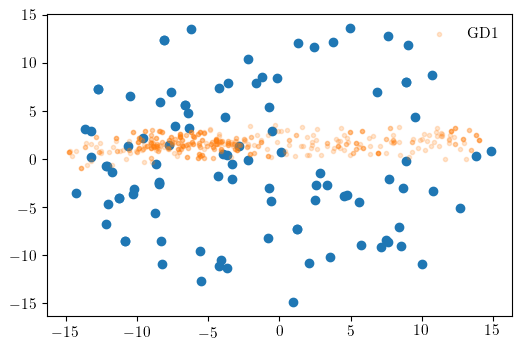

In [67]:
plt.scatter(x_arr, y_arr)
plt.scatter(gaiadata3[:,3], gaiadata3[:,2], marker = '.', alpha = 0.2, label = 'GD1')
plt.legend(frameon = False)

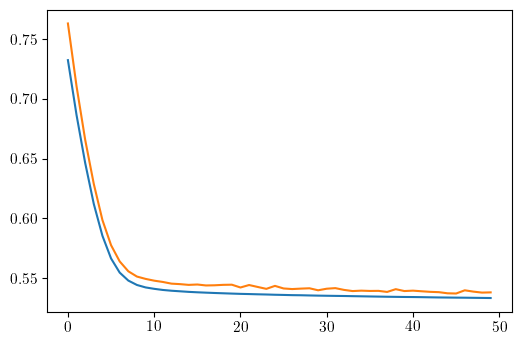

In [68]:
val_loss = np.load('optimized_tail_patch_plots/background25_layers256_dropout20_epochs50_lr5_kfold3_loops1_val_loss.npy')
loss = np.load('optimized_tail_patch_plots/background25_layers256_dropout20_epochs50_lr5_kfold3_loops1_loss.npy')
plt.plot(val_loss)
plt.plot(loss)

In [69]:
df_10, _ = load_file(stream = "gd1_tail", folder = "/home/sowmyathanvantri/GaiaCWoLa/", percent_bkg = 10)



Before reduction, stream stars make up 0.088% of the dataset.
After reduction, stream stars make up 5.891% of the dataset.


Sideband region: [-7.0,-3.0]
Signal region: [-6.0,-3.1]
Total counts: SR = 9,176, SB = 2,680


/home/sowmyathanvantri/GaiaCWoLa/functions.py:266: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_slice['label'] = np.where(((df_slice.μ_δ > sr_min) & (df_slice.μ_δ < sr_max)), 1, 0)
No handles with labels found to put in legend.


Signal region has 243 stream and 8,933 bkg events (2.72%).
Sideband region has 21 stream and 2,659 bkg events (0.79%).
f_sig = 3.4X f_sideband.


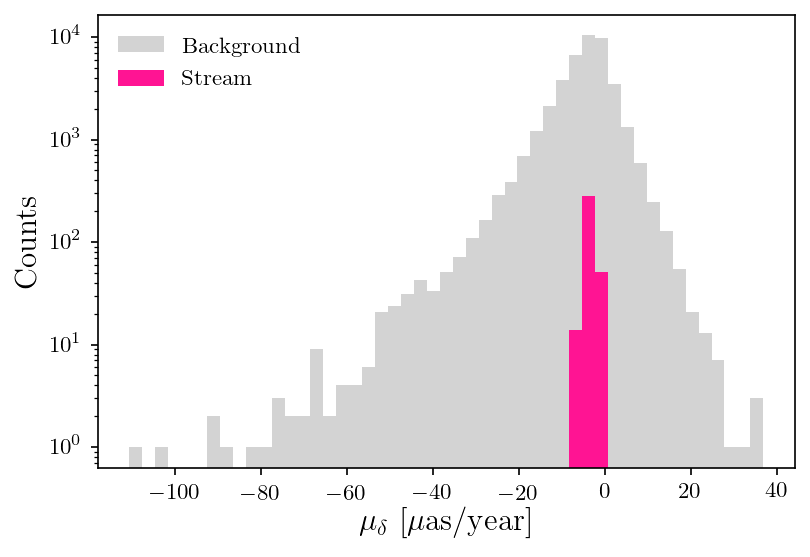

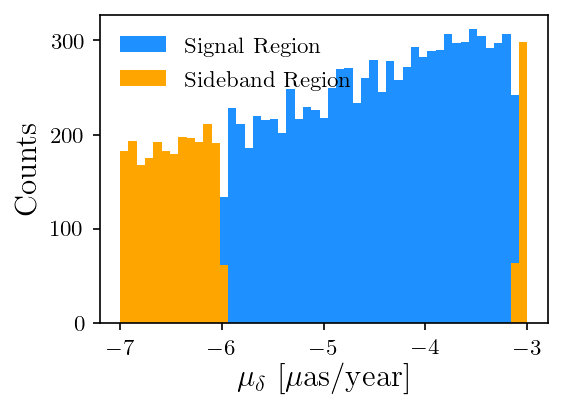

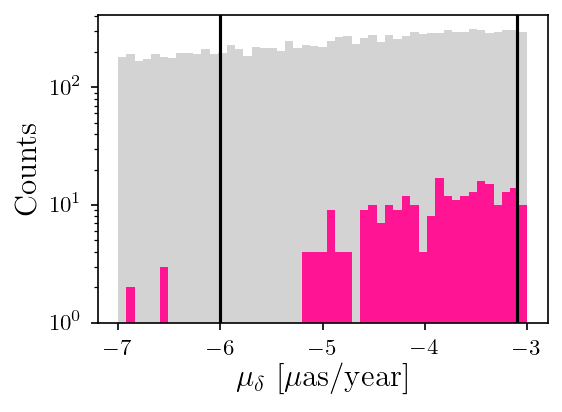

In [70]:
sr_sb_10 = signal_sideband(df_10, sb_min = -7, sb_max = -3, sr_min = -6, sr_max = -3.1)

In [71]:
SR_10 = np.array(sr_sb_10[sr_sb_10.label == 1])[:, 1:7]
SB_10 = np.array(sr_sb_10[sr_sb_10.label == 0])[:, 1:7]
X_10 = np.concatenate([SR_10, SB_10])
Y_10 = np.concatenate([np.ones(len(SR_10)),np.zeros(len(SB_10))])

myscalar = preprocessing.StandardScaler()
myscalar.fit(X_10)
X_scaled_10 = myscalar.transform(X_10)

X_scaled_10 = X_scaled_10[Y_10<2]
Y_10 = Y_10[Y_10<2]

In [75]:
model(X_scaled_10, Y_10, myscalar, 10, 50, 0.25, 1e-5, 1, 3)

outer loop
middle loop
middle loop
inner loop
middle loop
inner loop
outer loop
middle loop
inner loop
middle loop
middle loop
inner loop
outer loop
middle loop
inner loop
middle loop
inner loop
middle loop


In [76]:
x_arr = np.load('optimized_tail_patch_plots/background10_layers256_dropout0.25_epochs50_lr1e-05_kfold3_loops1_x.npy')
y_arr = np.load('optimized_tail_patch_plots/background10_layers256_dropout0.25_epochs50_lr1e-05_kfold3_loops1_y.npy')

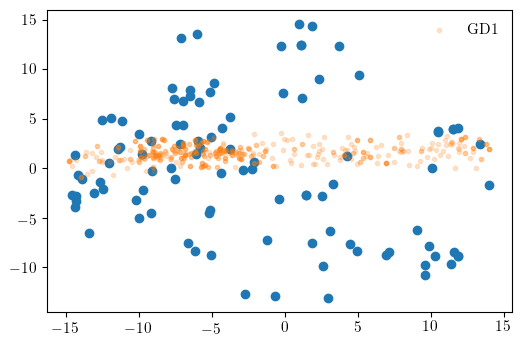

In [77]:
plt.scatter(x_arr, y_arr)
plt.scatter(gaiadata3[:,3], gaiadata3[:,2], marker = '.', alpha = 0.2, label = 'GD1')
plt.legend(frameon = False)

Before reduction, stream stars make up 0.088% of the dataset.
After reduction, stream stars make up 859.582% of the dataset.
Sideband region: [-7.0,-3.0]
Signal region: [-6.0,-3.1]


/home/sowmyathanvantri/GaiaCWoLa/functions.py:266: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_slice['label'] = np.where(((df_slice.μ_δ > sr_min) & (df_slice.μ_δ < sr_max)), 1, 0)


Total counts: SR = 206, SB = 17


No handles with labels found to put in legend.
/home/sowmyathanvantri/GaiaCWoLa/functions.py:305: RuntimeWarning: divide by zero encountered in long_scalars
  print("Signal region has {:,} stream and {:,} bkg events ({:.2f}%).".format(n_sig_stream_stars, n_sig_bkg_stars,100*n_sig_stream_stars/n_sig_bkg_stars))
/home/sowmyathanvantri/GaiaCWoLa/functions.py:306: RuntimeWarning: divide by zero encountered in long_scalars
  print("Sideband region has {:,} stream and {:,} bkg events ({:.2f}%).".format(n_sideband_stream_stars, n_sideband_bkg_stars, 100*n_sideband_stream_stars/n_sideband_bkg_stars))
/home/sowmyathanvantri/GaiaCWoLa/functions.py:307: RuntimeWarning: divide by zero encountered in long_scalars
  print("f_sig = {:.1f}X f_sideband.".format(n_sig_stream_stars/n_sig_bkg_stars/(n_sideband_stream_stars/n_sideband_bkg_stars)))
/home/sowmyathanvantri/GaiaCWoLa/functions.py:307: RuntimeWarning: invalid value encountered in double_scalars
  print("f_sig = {:.1f}X f_sideband.".format(n_sig

Signal region has 206 stream and 0 bkg events (inf%).
Sideband region has 17 stream and 0 bkg events (inf%).
f_sig = nanX f_sideband.


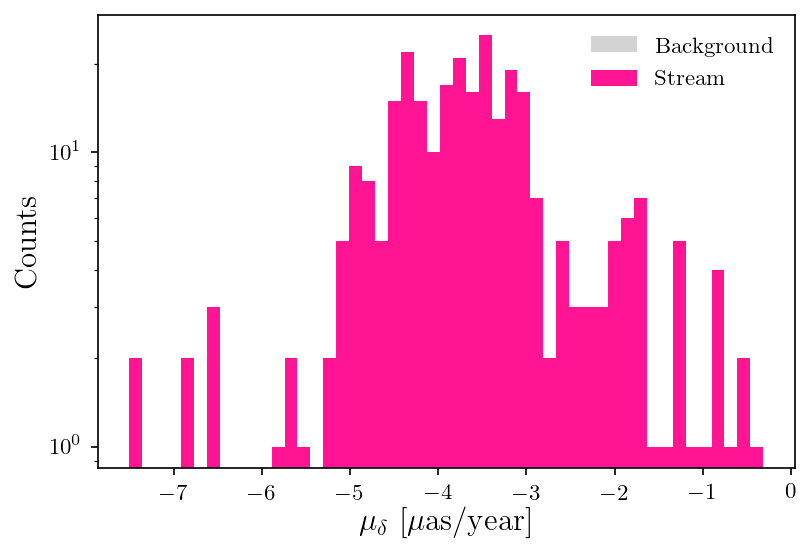

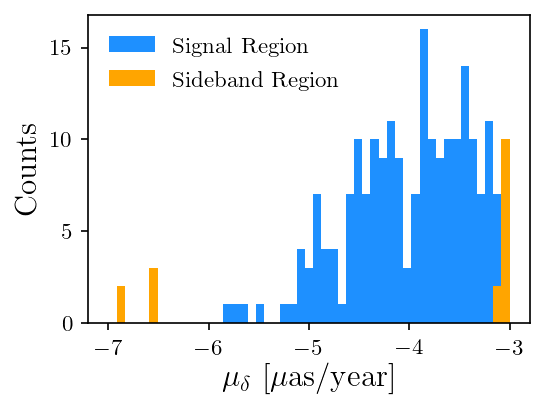

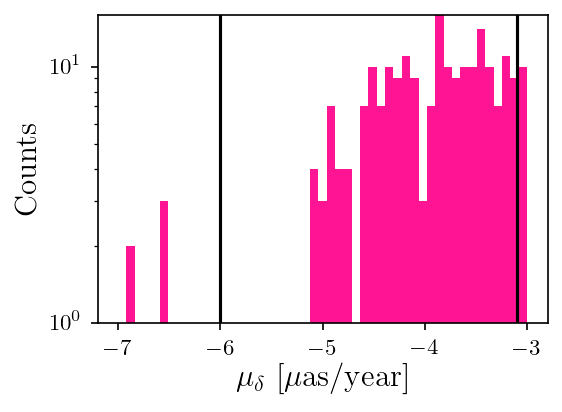

In [78]:
df_0, _ = load_file(stream = "gd1_tail", folder = "/home/sowmyathanvantri/GaiaCWoLa/", percent_bkg = 0)

sr_sb_0 = signal_sideband(df_0, sb_min = -7, sb_max = -3, sr_min = -6, sr_max = -3.1)

SR_0 = np.array(sr_sb_0[sr_sb_0.label == 1])[:, 1:7]
SB_0 = np.array(sr_sb_0[sr_sb_0.label == 0])[:, 1:7]
X_0 = np.concatenate([SR_0, SB_0])
Y_0 = np.concatenate([np.ones(len(SR_0)),np.zeros(len(SB_0))])

myscalar = preprocessing.StandardScaler()
myscalar.fit(X_0)
X_scaled_0 = myscalar.transform(X_0)

X_scaled_0 = X_scaled_0[Y_0<2]
Y_0 = Y_0[Y_0<2]

In [79]:
model(X_scaled_0, Y_0, myscalar, 0, 50, 0.25, 1e-5, 1, 3)

outer loop
middle loop
middle loop
inner loop
middle loop
inner loop
outer loop
middle loop
inner loop
middle loop
middle loop
inner loop
outer loop
middle loop
inner loop
middle loop
inner loop
middle loop


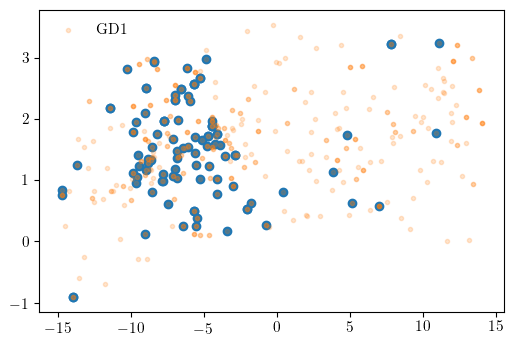

In [84]:
x_arr = np.load('optimized_tail_patch_plots/background0_layers256_dropout0.25_epochs50_lr1e-05_kfold3_loops1_x.npy')
y_arr = np.load('optimized_tail_patch_plots/background0_layers256_dropout0.25_epochs50_lr1e-05_kfold3_loops1_y.npy')
plt.scatter(x_arr, y_arr)
plt.scatter(gaiadata3[:,3], gaiadata3[:,2], marker = '.', alpha = 0.2, label = 'GD1')
plt.legend(frameon = False)

In [ ]:
def model(X_scaled, Y, myscalar, background, epochs, dropout, learning_rate, num_loops, num_splits, layer_size, batch_size):
    
    np.random.seed(27)
    np.random.shuffle(X_scaled)
    np.random.seed(27)
    np.random.shuffle(Y)

    split_X = split(X_scaled, num_splits)
    split_Y = split(Y, num_splits)

    preds_overall = []
    X_test_unscaled_all = []

    for test_counter in range(num_splits):
        print('outer loop')
        X_test, Y_test = split_X[test_counter], split_Y[test_counter]

        preds_average = []

        for val_counter in range(num_splits):
            print('middle loop')
            if val_counter != test_counter:
                X_val, Y_val = split_X[val_counter], split_Y[val_counter]


                X_train = []
                Y_train = []
                for train_counter in range(num_splits):
                    if train_counter != test_counter and train_counter != val_counter:
                        if len(X_train) == 0:
                            X_train = split_X[train_counter]
                            Y_train = split_Y[train_counter]
                        else:
                            X_train = np.concatenate((X_train, split_X[train_counter]))
                            Y_train = np.concatenate((Y_train, split_Y[train_counter]))




                preds_best_loop = []
                min_loss = None


                for curr_index in range(num_loops):
                    print('inner loop')

                    model = Sequential()
                    initializer =tf.keras.initializers.glorot_normal()
                    model.add(Dense(layer_size, input_dim=5, activation='relu', bias_initializer = initializer)) 
                    model.add(Dropout(dropout))
                    model.add(Dense(layer_size, activation='relu', bias_initializer = initializer))
                    model.add(Dropout(dropout))
                    model.add(Dense(layer_size, activation='relu', bias_initializer = initializer))
                    model.add(Dropout(dropout))
                    model.add(Dense(1, activation='sigmoid', bias_initializer = initializer))
                    optimizer = keras.optimizers.Adam(lr=learning_rate)
                    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
                    history = model.fit(X_train[:,1:],Y_train, epochs=epochs, batch_size=batch_size, 
                                        validation_data=(X_val[:,1:], Y_val), verbose = 0) 

                    preds_curr = model.predict(X_test[:,1:], batch_size=int(0.1*len(X_test)))
                    curr_loss = history.history['val_loss'][epochs - 1]

                    if not min_loss or curr_loss < min_loss:
                        preds_best_loop = preds_curr
                        min_loss = curr_loss

                if len(preds_average) == 0:
                    preds_average = preds_best_loop
                else:
                    preds_average += preds_best_loop




        preds_overall.extend(preds_average)
        X_test_unscaled_all.extend(myscalar.inverse_transform(X_test))


    preds_overall = np.array(preds_overall)
    stars_passing_cut = []
    preds_sorted = preds_overall[np.argsort(preds_overall[:,0])]
    X_test_unscaled_all = np.array(X_test_unscaled_all)
    X_test_sorted = X_test_unscaled_all[np.argsort(preds_overall[:,0])]
    X_test_sorted = X_test_sorted[(X_test_sorted[:,0] > -6) * (X_test_sorted[:,0] < -3.1)]

    stars_passing_cut = X_test_sorted[len(X_test_sorted) - 100:]

    description = 'background' + str(background) + '_layers256_dropout' + str(dropout) + '_epochs' + str(epochs) + '_lr' + str(learning_rate) + '_kfold' + str(num_splits) + '_loops' + str(num_loops)
    
    np.save('optimized_tail_patch_plots/' + description + '_x.npy', stars_passing_cut[:,3])
    np.save('optimized_tail_patch_plots/' + description + '_y.npy', stars_passing_cut[:,2])

    np.save('optimized_tail_patch_plots/' + description + '_val_loss.npy', history.history['val_loss'])
    np.save('optimized_tail_patch_plots/' + description + '_loss.npy', history.history['loss'])
    
#     gd1_in_top_100 = FilterGD1(stars_passing_cut)
#     accuracy = len(gd1_in_top_100)/100
#     return accuracy #metric

In [11]:
def train(df_slice, save_folder="optimized_tail_patch_plots/", n_folds=5, epochs=100, batch_size=32, layer_size=10, dropout=0, l2_reg=0, patience=10, best_of_n_loops=1, other_callbacks=None):
    os.makedirs(save_folder, exist_ok=True)
    if 'color' in df_slice.keys(): 
        training_vars = ['μ_α','δ','α','color','mag']
    elif 'b-r' in df_slice.keys():
        training_vars = ['μ_α','δ','α','g','b-r']
    train, validate, test = np.split(df_slice.sample(frac=1), [int(.7*len(df_slice)), int(.85*len(df_slice))]) # 70/15/15 train/validate/test split

    x_train, x_val, x_test = [train[training_vars], validate[training_vars], test[training_vars]]
    y_train, y_val, y_test = [train.label, validate.label, test.label]
    
    if 'weight' in df_slice.keys():
        sample_weight = train.weight
        print("Using stream weight = {}".format(train.weight.unique().max()))
    else:
        print("Not using sample weights")
        sample_weight = None

    from sklearn.preprocessing import StandardScaler
    sc = StandardScaler()
    x_train = sc.fit_transform(x_train)
    x_test = sc.transform(x_test)
    x_val = sc.transform(x_val)

    print("Training on {:,} events.".format(len(train)))

    if n_folds <= 1:  # train without k-folding
        best_losses = []
        for loop in range(best_of_n_loops): 
            ### Define model architecture 
            reg = regularizers.l2(l2_reg)
            model = Sequential()
            model.add(Dense(layer_size, input_dim=len(training_vars), activation='relu', activity_regularizer=reg)) 
            if dropout != 0: model.add(Dropout(dropout))
            model.add(Dense(layer_size, activation='relu', activity_regularizer=reg))
            if dropout != 0: model.add(Dropout(dropout))
            model.add(Dense(layer_size, activation='relu', activity_regularizer=reg))
            if dropout != 0: model.add(Dropout(dropout))
            model.add(Dense(1, activation='sigmoid'))
            model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
#             model.summary()

            # stops if val_loss doesn't improve for [patience] straight epochs
            early_stopping = callbacks.EarlyStopping(monitor='val_loss', 
                                                     patience=patience, 
                                                     verbose=0) 

            # saves weights from the epoch with lowest val_loss 
            weights_path = os.path.join(save_folder,"weights_loop{}.h5".format(loop))
            checkpoint = callbacks.ModelCheckpoint(weights_path, 
                                                   monitor='val_loss', 
                                                   mode='auto', 
                                                   verbose=0, 
                                                   save_best_only=True, 
                                                   save_weights_only=True)

            callbacks_list = [PlotLossesKeras(),checkpoint,early_stopping]
            if other_callbacks is not None:
                callbacks_list = callbacks_list + other_callbacks
                            
            ### Train!
            history = model.fit(x_train, y_train, 
                        epochs=epochs, 
                        sample_weight=sample_weight,
                        batch_size=batch_size,
                        validation_data=(x_val,y_val),
                        callbacks = callbacks_list,
                        verbose = 1,
                       )
            best_losses.append(np.min(history.history['loss']))
        
        ### Load best weights
        print("Best losses:", best_losses)
        print("Loading weights from best loop, i.e. loop #{}.".format(np.argmin(best_losses)))
        best_weights_path = os.path.join(save_folder,"weights_loop{}.h5".format(np.argmin(best_losses)))
        model.load_weights(best_weights_path)

    elif n_folds > 1: 
        # Define per-fold score containers
        acc_per_fold = []
        loss_per_fold = []

        inputs = np.concatenate((x_train,x_val), axis=0)
        targets = np.concatenate((y_train,y_val), axis=0)
    
        # Define the K-fold Cross Validator
        from sklearn.model_selection import KFold
        kfold = KFold(n_splits=n_folds, shuffle=True)
        fold_number = 0

        for train, validate in kfold.split(inputs, targets):
            print("\nTraining fold #{}...".format(fold_number))
            best_losses = []
            for loop in range(best_of_n_loops): 
                ### Define model architecture 
                reg = regularizers.l2(l2_reg)
                model = Sequential()
                model.add(Dense(layer_size, input_dim=len(training_vars), activation='relu', activity_regularizer=reg)) 
                if dropout != 0: model.add(Dropout(dropout))
                model.add(Dense(layer_size, activation='relu', activity_regularizer=reg))
                if dropout != 0: model.add(Dropout(dropout))
                model.add(Dense(layer_size, activation='relu', activity_regularizer=reg))
                if dropout != 0: model.add(Dropout(dropout))
                model.add(Dense(1, activation='sigmoid'))
                model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
#                 model.summary()

                # stops if val_loss doesn't improve for [patience] straight epochs
                early_stopping = callbacks.EarlyStopping(monitor='val_loss', 
                                                         patience=patience, 
                                                         verbose=1) 

                # saves weights from the epoch with lowest val_loss 
                checkpoint = callbacks.ModelCheckpoint(os.path.join(save_folder,"kfold{}_loop{}_weights.h5".format(fold_number,loop)), 
                                                       monitor='val_loss', 
                                                       mode='auto', 
                                                       verbose=1, 
                                                       save_best_only=True, 
                                                       save_weights_only=True)

                history = model.fit(inputs[train], targets[train], 
                                epochs=epochs, 
                                batch_size=batch_size,
                                validation_data = (inputs[validate], targets[validate]),
                                callbacks = [
                                             # PlotLossesKeras(),
                                             checkpoint,early_stopping],
                                verbose = 1,
                               )
                best_losses.append(np.min(history.history['loss']))

            ### Load best weights
            print("Best losses:", best_losses)
            print("Loading weights from best loop, i.e. loop #{}.".format(np.argmin(best_losses)))
            weights_path = os.path.join(save_folder,"kfold{}_loop{}_weights.h5".format(fold_number, np.argmin(best_losses)))
            model.load_weights(weights_path)
            shutil.copy(os.path.join(save_folder,"kfold{}_loop{}_weights.h5".format(fold_number, np.argmin(best_losses))),os.path.join(save_folder,"kfold{}_best_weights.h5".format(fold_number)))
                
            # Evaluate trained model
            scores = model.evaluate(inputs[validate], targets[validate], verbose=0)
            y_pred = model.predict(inputs[validate]).ravel()
            print('Score for fold {}: {} of {:.2f}; {} of {:.2f}%'.format(fold_number,model.metrics_names[0], scores[0],model.metrics_names[1],scores[1]*100))
            acc_per_fold.append(scores[1] * 100)
            loss_per_fold.append(scores[0])
            fold_number += 1

        # == Provide average scores ==
        print('------------------------------------------------------------------------')
        print('Score per fold')
        for i in range(0, len(acc_per_fold)):
            print('------------------------------------------------------------------------')
            print('> Fold {} - Loss: {:.2f} - Accuracy: {:.2f}%'.format(i+1, loss_per_fold[i], acc_per_fold[i]))
        print('------------------------------------------------------------------------')
        print('Average scores for all folds:')
        print('> Accuracy: {:.2f} (+- {:.2f})'.format(np.mean(acc_per_fold),np.std(acc_per_fold)))
        print('> Loss: {:.2f}'.format(np.mean(loss_per_fold)))
        print('------------------------------------------------------------------------')
        print('Best fold number (lowest loss): {}'.format(np.argmin(loss_per_fold)))

        best_fold_number = np.argmin(loss_per_fold)
        model.load_weights(os.path.join(save_folder,"kfold{}_best_weights.h5".format(best_fold_number)))
        
    ### Save training losses & accuracies
    fig, axs = plt.subplots(nrows=1, ncols=2, figsize = (12,6))
    ax = axs[0]
    ax.plot(history.history["acc"], label="Training Accuracy")
    ax.plot(history.history["val_acc"], label="Validation Accuracy")
    ax.set_title("Accuracy")
    ax.set_xlabel("Epochs")
    ax.legend()

    ax = axs[1]
    ax.plot(history.history["loss"], label="Training Loss")
    ax.plot(history.history["val_loss"], label="Validation Loss")
    ax.set_title("Loss")
    ax.set_xlabel("Epochs")
    ax.legend()
    plt.savefig(os.path.join(save_folder,"loss_curves.png"))
    
    ### Add the NN prediction score to the test set: 
    test["nn_score"] = model.predict(x_test)
    fake_eff_baseline, real_eff_baseline, thresholds = roc_curve(np.asarray(y_test), test.nn_score)
    auc_baseline = auc(fake_eff_baseline, real_eff_baseline)
    print("AUC: {:.3f}".format(auc_baseline))

    ### Plot scores:
    plot_results(test, save_folder=save_folder)
    
    ### Save test DataFrame for future plotting
    test.to_hdf(os.path.join(save_folder,"df_test.h5"), "df")
    
    return(test)
    
    

In [13]:
from functions import *

Sideband region: [-7.0,-3.0]
Signal region: [-6.0,-3.1]


../python/functions.py:242: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_slice['label'] = np.where(((df_slice.μ_δ > sr_min) & (df_slice.μ_δ < sr_max)), 1, 0)


Total counts: SR = 613,810, SB = 181,912


No handles with labels found to put in legend.


Signal region has 1,565 stream and 612,245 bkg events (0.26%).
Sideband region has 94 stream and 181,818 bkg events (0.05%).
f_sig = 4.9X f_sideband.


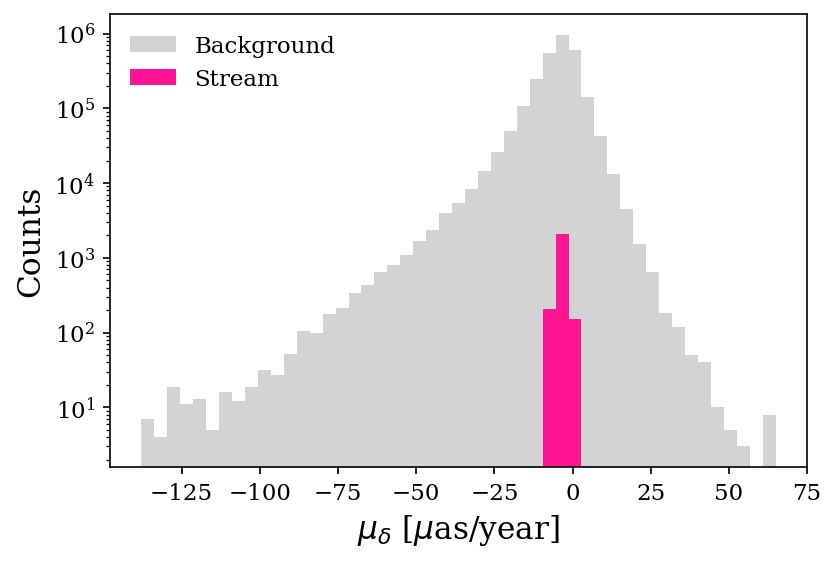

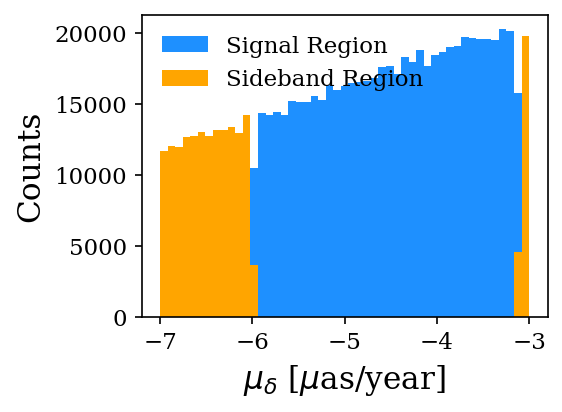

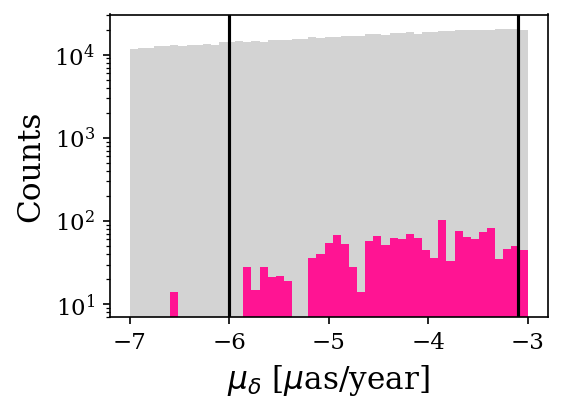

In [4]:
df, _ = load_file(stream = "gd1_tail", 
                  folder = "/data0/users/sowmyathanvantri/gaia_data" , 
                  percent_bkg = 100)

sr_sb = signal_sideband(df, sb_min = -7, sb_max = -3, sr_min = -6, sr_max = -3.1)


KeyboardInterrupt: 

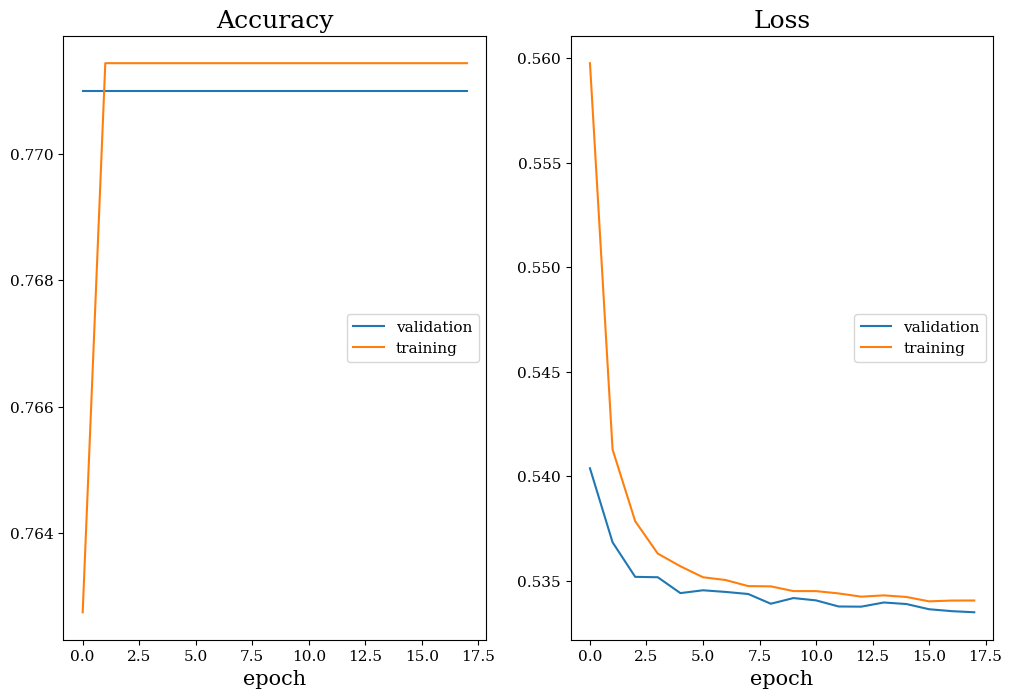

In [5]:
test = train(sr_sb, n_folds = 1, best_of_n_loops = 1, layer_size = 128, batch_size = 10000, dropout = 0.2, epochs = 2000, patience = 30)

In [16]:
from keras.layers import Input, Dense, Dropout
from keras.models import Model, Sequential
from keras import callbacks, regularizers
from sklearn.metrics import roc_curve, auc,roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from livelossplot.keras import PlotLossesCallback
from livelossplot import PlotLossesKeras

Not using sample weights
Training on 557,005 events.

Training fold #0...
Train on 450908 samples, validate on 225455 samples
Epoch 1/2000
450908/450908 [==============================] - 1s 3us/step - loss: 0.5634 - acc: 0.7609 - val_loss: 0.5392 - val_acc: 0.7732

Epoch 00001: val_loss improved from inf to 0.53915, saving model to optimized_tail_patch_plots/kfold0_loop0_weights.h5
Epoch 2/2000
450908/450908 [==============================] - 1s 1us/step - loss: 0.5434 - acc: 0.7703 - val_loss: 0.5369 - val_acc: 0.7732

Epoch 00002: val_loss improved from 0.53915 to 0.53686, saving model to optimized_tail_patch_plots/kfold0_loop0_weights.h5
Epoch 3/2000
450908/450908 [==============================] - 1s 1us/step - loss: 0.5407 - acc: 0.7703 - val_loss: 0.5352 - val_acc: 0.7732

Epoch 00003: val_loss improved from 0.53686 to 0.53517, saving model to optimized_tail_patch_plots/kfold0_loop0_weights.h5
Epoch 4/2000
450908/450908 [==============================] - 1s 1us/step - loss: 0.53

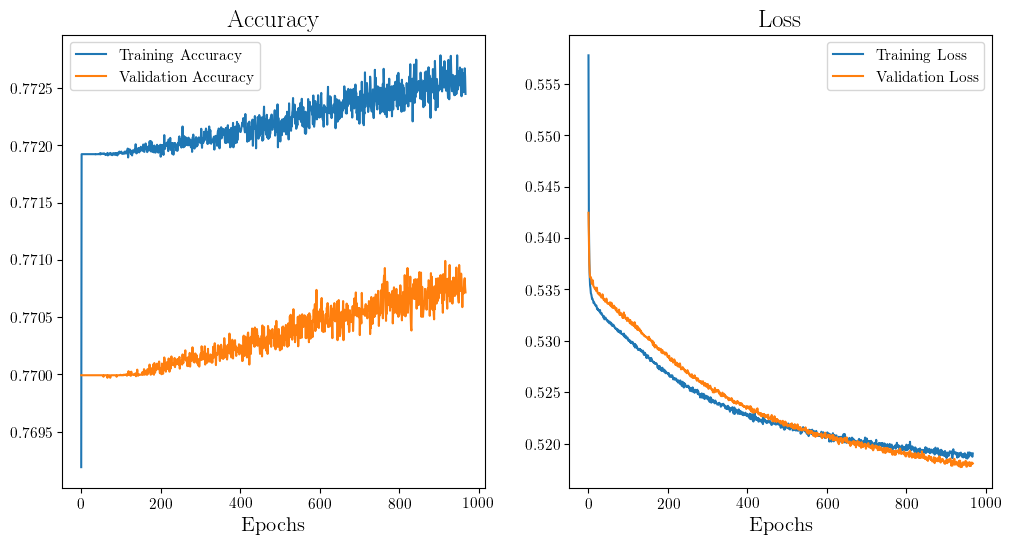

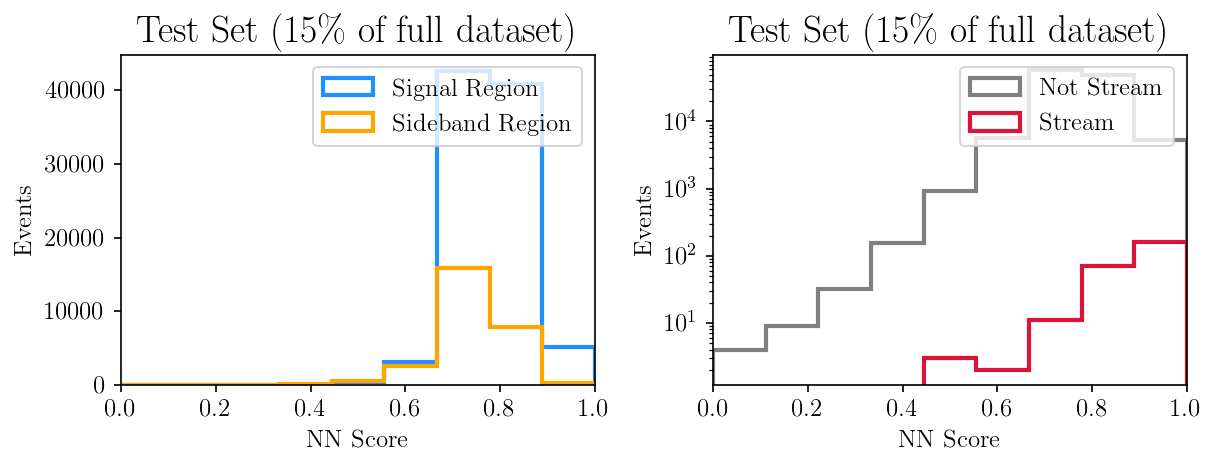

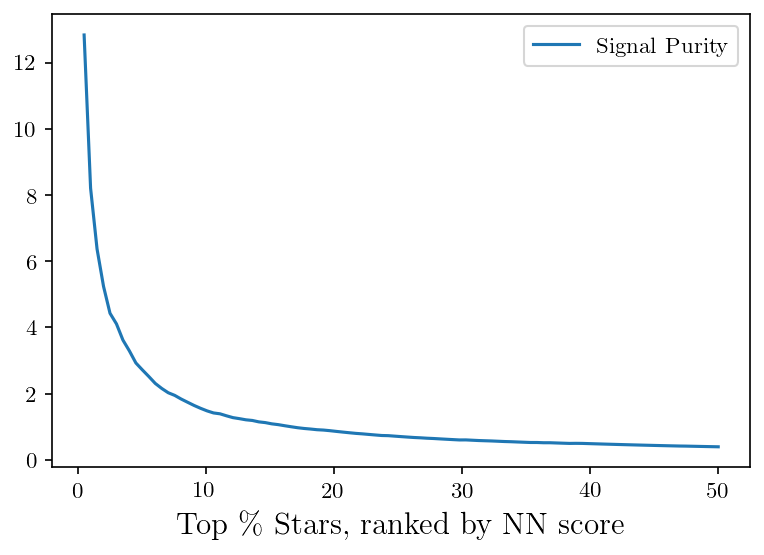

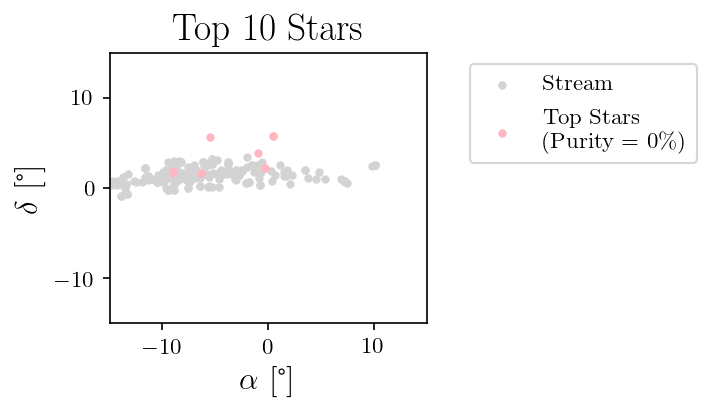

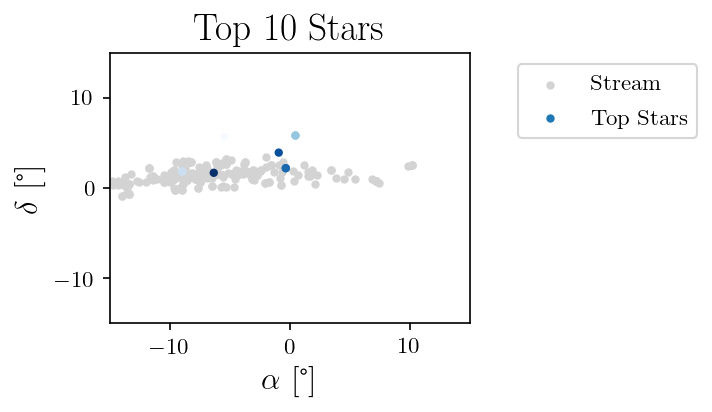

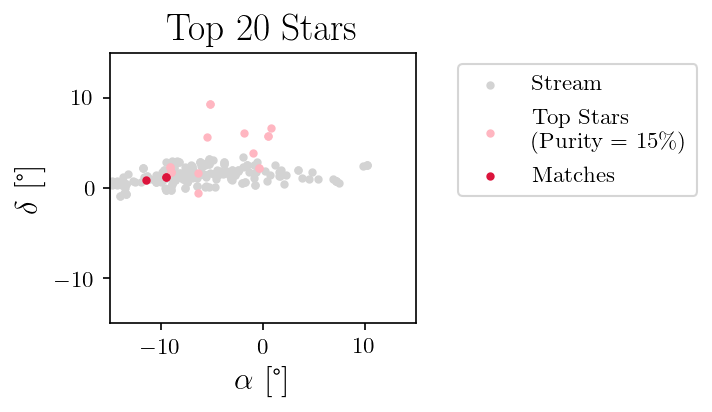

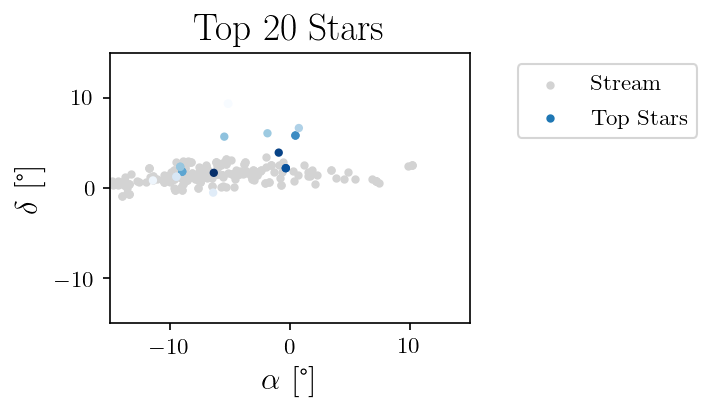

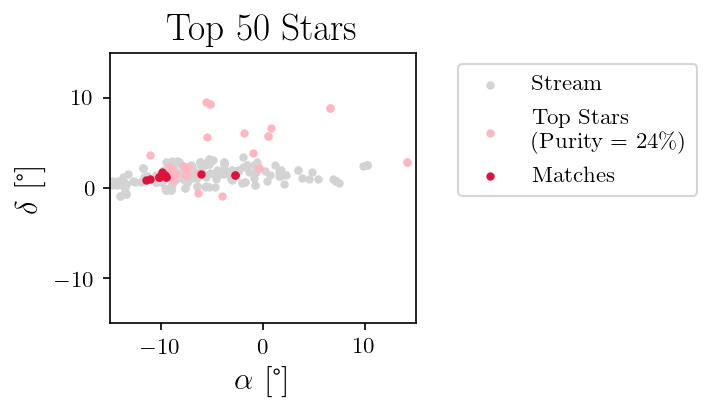

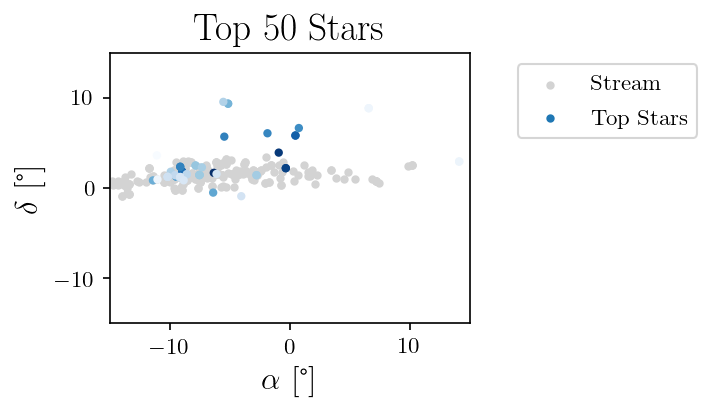

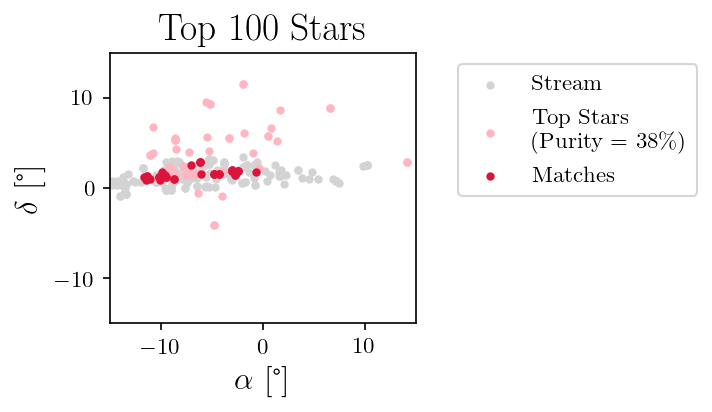

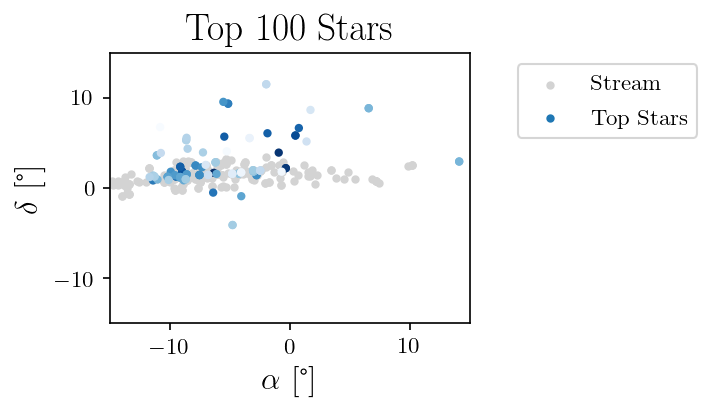

In [23]:
test = train(sr_sb, n_folds = 3, best_of_n_loops = 1, layer_size = 128, batch_size = 10000, dropout = 0.2, epochs = 2000, patience = 30)

In [22]:
import shutil